In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set
sns.set_context('talk')

In [3]:
from collections import OrderedDict
fontsize = dict(
    large=11,
    normal=10,
    small=9,
    tiny=8,
)

qm_font_large = 11
qm_font_small = 9

cb,co,cg,cr = plt.cm.Blues(.6), \
    plt.cm.Oranges(.6), plt.cm.Greens(.6), plt.cm.Reds(.6)
offblack = '#262626'
gray = '0.8'

# new tableau colors
# https://www.tableau.com/about/blog/2016/7/colors-upgrade-tableau-10-56782
colors = OrderedDict([
    ('blue', '#4e79a7'),
    ('orange', '#f28e2b'),
    ('green', '#59a14f'),
    ('red', '#e15759'),
    ('cyan', '#76b7b2'),
    ('purple', '#b07aa1'),
    ('brown', '#9c755f'),
    ('yellow', '#edc948'),
    ('pink', '#ff9da7'),
    ('gray', '#bab0ac')
])

offblack = '.15'

plt.rcdefaults()
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Lato'],
    'mathtext.fontset': 'custom',
    'mathtext.default': 'it',
    'mathtext.rm': 'sans',
    'mathtext.it': 'sans:italic:medium',
    'mathtext.cal': 'sans',
    'font.size': fontsize['normal'],
    'legend.fontsize': fontsize['normal'],
    'axes.labelsize': fontsize['normal'],
    'axes.titlesize': fontsize['large'],
    'xtick.labelsize': fontsize['small'],
    'ytick.labelsize': fontsize['small'],
    #'font.weight': 400,
    'axes.labelweight': 400,
    'axes.titleweight': 400,
    'axes.prop_cycle': plt.cycler('color', list(colors.values())),
    'lines.linewidth': .8,
    'lines.markersize': 3,
    'lines.markeredgewidth': 0,
    'patch.linewidth': .8,
    'axes.linewidth': .6,
    'xtick.major.width': .6,
    'ytick.major.width': .6,
    'xtick.minor.width': .4,
    'ytick.minor.width': .4,
    'xtick.major.size': 3.,
    'ytick.major.size': 3.,
    'xtick.minor.size': 2.,
    'ytick.minor.size': 2.,
    'xtick.major.pad': 3.5,
    'ytick.major.pad': 3.5,
    'axes.labelpad': 4.,
    'axes.formatter.limits': (-5, 5),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'text.color': offblack,
    'axes.edgecolor': offblack,
    'axes.labelcolor': offblack,
    'xtick.color': offblack,
    'ytick.color': offblack,
    'legend.frameon': False,
    'image.cmap': 'Blues',
    'image.interpolation': 'none',
})

In [4]:
#get the coordinates
nx = 401 #total number of points
dx = 0.075
Lx = (nx - 1)/2.0 * dx # 1/2 the total grid size
x_coords = y_coords = np.arange(-Lx, Lx + dx, dx)
XX, YY = np.meshgrid(x_coords, y_coords)

#scale the values by hbarc for plotting reasons
hbarc = 0.197326938
#the 'critical' energy density (just a low temperature)
e_c = 0.1 # ~127 MeV ?

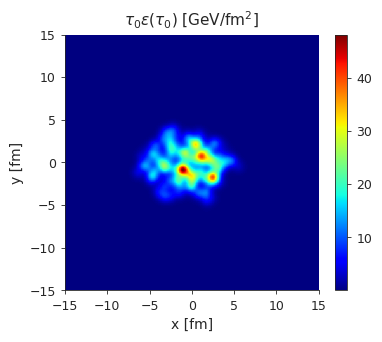

In [27]:
e_i = np.loadtxt('eta_s_0.4/output/initial_e_projection.dat')*hbarc
#plt.contourf(xcoords, ycoords, e_i, cmap='jet')
plt.subplots(1,1, figsize=(4,3.5))
plt.pcolor(XX, YY, e_i, cmap='jet')
plt.colorbar()
plt.title(r"$\tau_0 \epsilon(\tau_0)$ [GeV/fm$^2$]")
plt.xlabel('x [fm]')
plt.ylabel('y [fm]')
plt.tight_layout(True)
plt.savefig('plots/ei.png', dpi=400)
plt.show()

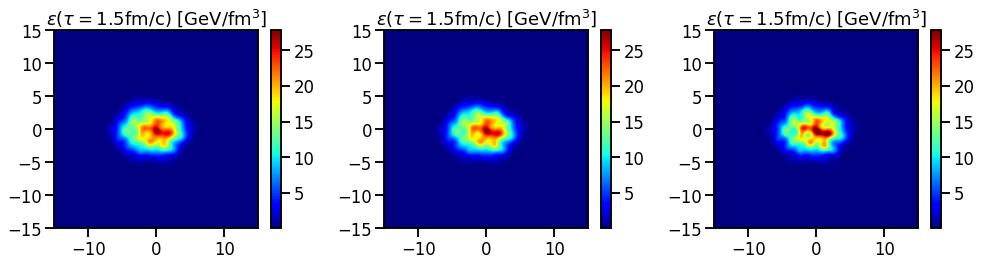

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for col, eta, ax in zip([0, 1, 2], ['10', '2', '0.4'], axes.ravel() ):
    e_f = np.loadtxt('eta_s_' + eta + '/output/e_projection.dat')*hbarc
    if col == 0:
        vmin = np.min(e_f)
        vmax = np.max(e_f)
    im = axes[col].pcolor(XX, YY, e_f, vmin=vmin, vmax=vmax, cmap='jet')
    fig.colorbar(im, ax=ax)
    axes[col].set_title(r"$\epsilon(\tau=1.5 $fm/c$)$ [GeV/fm$^3$]")
plt.tight_layout(True)
plt.savefig('plots/ef.png', dpi=400)
plt.show()

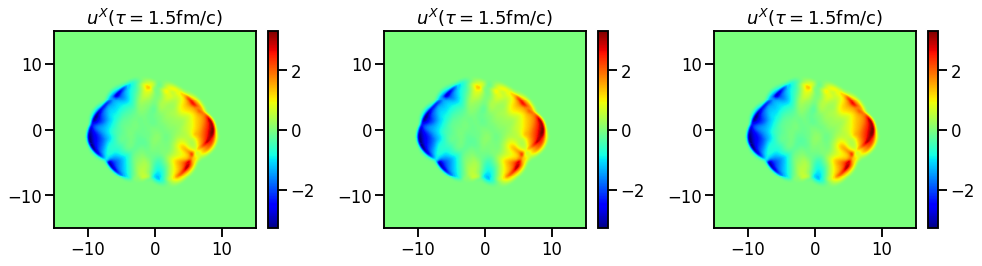

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for col, eta, ax in zip([0, 1, 2], ['10', '2', '0.4'], axes.ravel() ):
    u_f = np.loadtxt('eta_s_' + eta + '/output/u_x_projection.dat')
    if col == 0:
        vmin = np.min(u_f)
        vmax = np.max(u_f)
    im = axes[col].pcolor(XX, YY, u_f, vmin=vmin, vmax=vmax, cmap='jet')
    fig.colorbar(im, ax=ax)
    axes[col].set_title(r"$u^X(\tau=1.5 $fm/c$)$")
plt.tight_layout(True)
plt.savefig('plots/u_x.png', dpi=400)
plt.show()

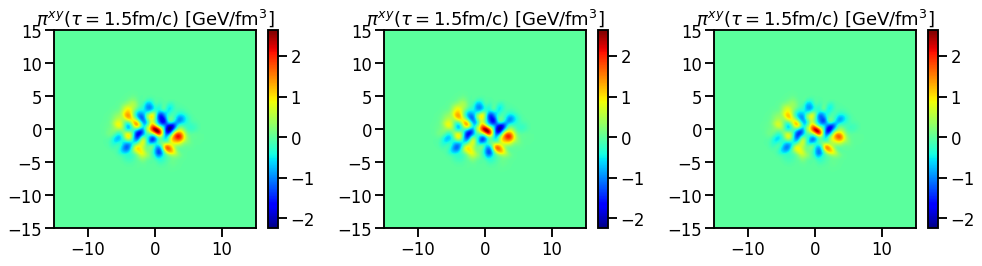

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for col, eta, ax in zip([0, 1, 2], ['10', '2', '0.4'], axes.ravel() ):
    pi_f = np.loadtxt('eta_s_' + eta + '/output/pi_x_y_projection.dat')*hbarc
    if col == 0:
        vmin = np.min(pi_f)
        vmax = np.max(pi_f)
    im = axes[col].pcolor(XX, YY, pi_f, vmin=vmin, vmax=vmax, cmap='jet')
    fig.colorbar(im, ax=ax)
    axes[col].set_title(r"$\pi^{xy}(\tau=1.5 $fm/c$)$ [GeV/fm$^3$]")
plt.tight_layout(True)
plt.savefig('plots/pi_xy.png', dpi=400)
plt.show()

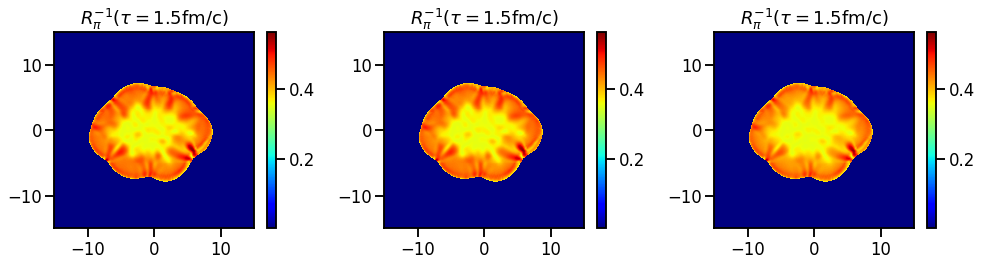

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for col, eta, ax in zip([0, 1, 2], ['10', '2', '0.4'], axes.ravel() ):
    pi_f = np.loadtxt('eta_s_' + eta + '/output/R_pimunu_Inv_projection.dat')
    if col == 0:
        vmin = np.min(pi_f)
        vmax = np.max(pi_f)
    im = axes[col].pcolor(XX, YY, pi_f, vmin=vmin, vmax=vmax, cmap='jet')
    fig.colorbar(im, ax=ax)
    axes[col].set_title(r"$R^{-1}_{\pi}(\tau=1.5 $fm/c$)$")
plt.tight_layout(True)
plt.savefig('plots/R_pi_inv.png', dpi=400)
plt.show()

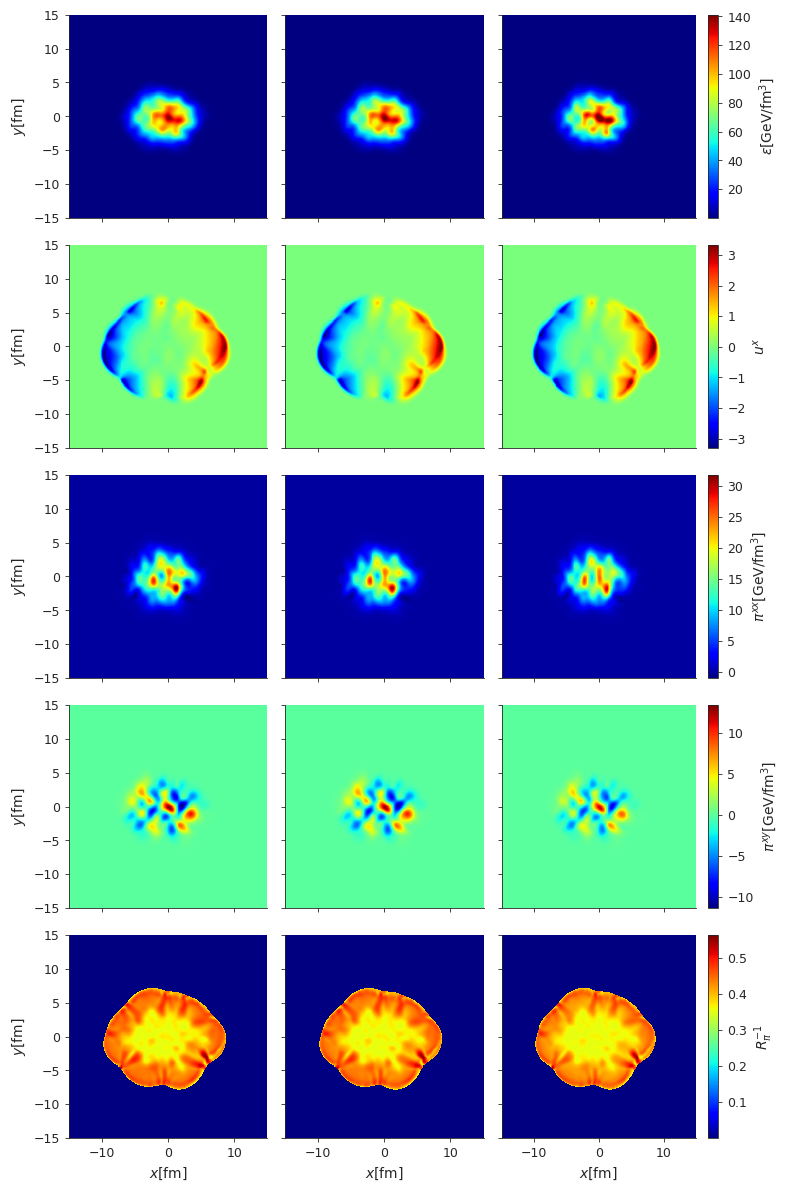

In [6]:
obs_file = {'e' : 'e', 'u' : 'u_x', 'pi_T' : 'pi_x_x', 'pi_a' : 'pi_x_y', 'R' : 'R_pimunu_Inv' }
cbar_label = {'e' : r'$\epsilon $[GeV/fm$^3$]', 'u' : r'$u^x$', 'pi_T' : r'$\pi^{xx} $[GeV/fm$^3$]',
              'pi_a' : r'$\pi^{xy} $[GeV/fm$^3$]', 'R' : r'$R^{-1}_{\pi}$' }
width_ratios = [0.31, 0.31, 0.38]
fig, axes = plt.subplots(5, 3, figsize=(8, 12), sharex=True, sharey=True, 
                         gridspec_kw={'width_ratios': width_ratios})
for row, obs in enumerate(['e', 'u', 'pi_T', 'pi_a', 'R']):
    for col, eta in enumerate(['10', '2', '0.4']):
        obs_f = np.loadtxt('eta_s_' + eta + '/output/' + obs_file[obs] + '_projection.dat')
        if col == 0:
            vmin = np.min(obs_f)
            vmax = np.max(obs_f)
        im = axes[row, col].pcolor(XX, YY, obs_f, vmin=vmin, vmax=vmax, cmap='jet')
        if axes[row,col].is_last_row():
            axes[row,col].set_xlabel(r'$x$[fm]')
        if axes[row,col].is_first_col():
            axes[row,col].set_ylabel(r'$y$[fm]')
        if axes[row,col].is_last_col():
            fig.colorbar(im, ax=axes[row,col], label=cbar_label[obs])
            
plt.tight_layout(True)
plt.savefig('plots/all_vars.png', dpi=400)
plt.show()